<a href="https://colab.research.google.com/github/cyzzzzz/becarziss/blob/master/BankChurn_Production_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bank Customer Churn Classification**

#**BLUF**
(Bottom Line Up Front)

*Insert your BLUF comments here.*




#**Business Problem**

The objective of the project is to predict whether a bank customer will churn at the end of their subscription period.

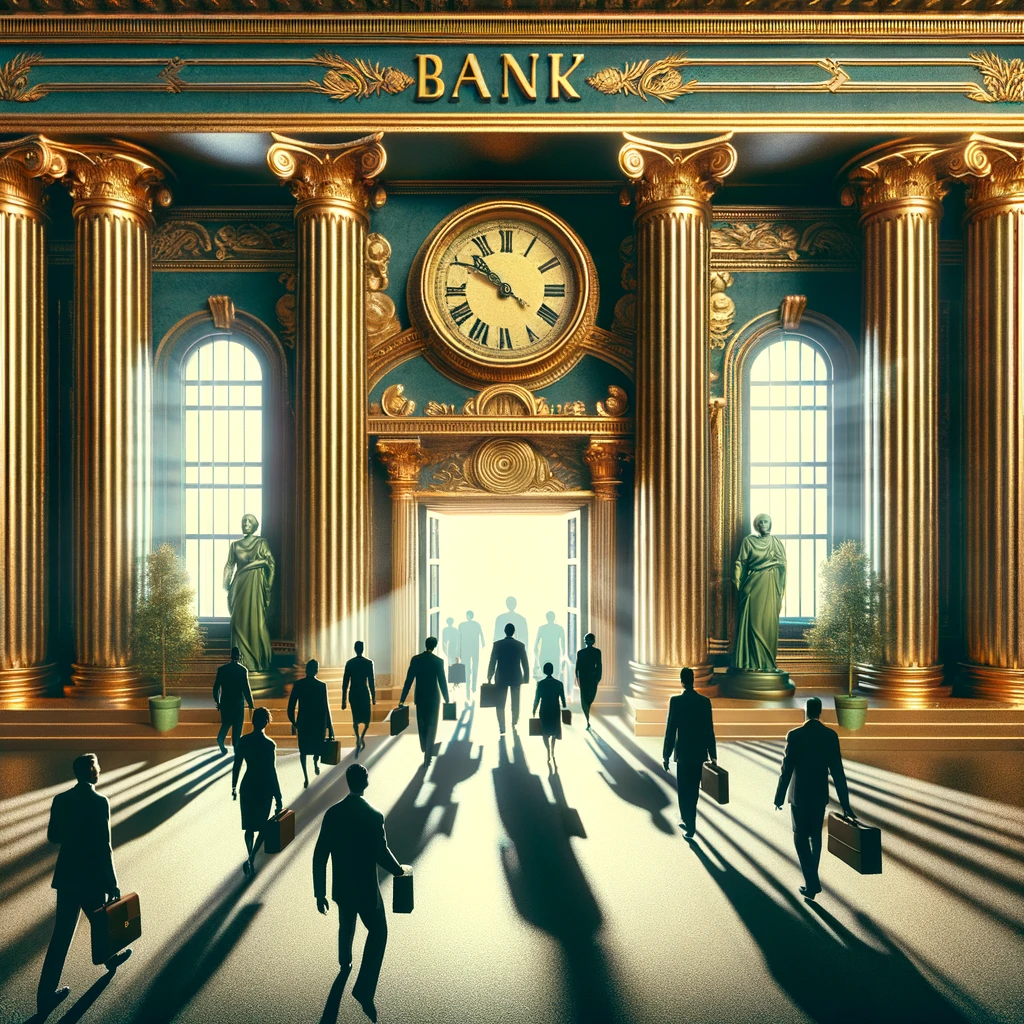

#**Data Dictionary**

* Attrition_flag: target (1 = churn)
* Gender: Male or Female
* Customer age: Age of the customer
* Income category: To which income category does the customer belongs to.
* Months Inactive: Amount of inactivity when using the credit card.
* Credit Limit: Credit Limit the customer currently has.
* Total Revolving Balance: The unpaid portion that carries over to the next month when a customer does not pay.
* Average Utilization Ratio: Measures how much credit you are using compared to how much you have available.
* Open to buy: The amount of credit available at a given time on a credit card holders account. Thus, the average open to buy is the average credit available allocated to a specific customer.

#**Libraries**

In [ ]:
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
!pip install pycaret
from pycaret.classification import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.4 MB

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
from pytorch_lightning import LightningModule

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
import scipy.stats as ss

In [ ]:
# PyTorch Lightning
import torch
from torch.utils.data import DataLoader, Dataset
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from torch import nn
from torch.nn import functional as F

In [ ]:
# Scikit learn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
# LightGBM Library
!pip install lightgbm
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [ ]:
# Imblearn library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

In [ ]:
!pip install fancyimpute
from fancyimpute import KNN

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.9 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=5c6dbfae62d79807f23bbc6745cdd4f585ea9c2e689308f2e5fdc6dbc19a86f5
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=7547a0779ca09af1165cd6c0230faa9c239bbbda14cf68dac1282a0d94f73c25
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
%matplotlib inline


In [ ]:
# Basic libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as ss
import math
from matplotlib.colors import ListedColormap


In [ ]:
# sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, log_loss, balanced_accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

In [ ]:
# mblearn library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

#**Data**

- Age: age of customer
- FrequentFlyer: Whether Customer takes frequent flights (binary)  
- AnnualIncomeClass: Class of annual income of user (middle income, low inclme, other)
- ServicesOpted: Number of times services opted during recent years
- AccountSyncedToSocialMedia: Whether Company Account Of User Synchronised to Their Social Media (binary)  
- BookedHotelOrNot: Whether the customer book lodgings/Hotels using company services (binary)
- Target: binary, 1 = churn.

In [ ]:
# Read
#url = https://drive.google.com/file/d/1VoGcrNzq_x3ItzTokdf6ZxYvZVT0QpVa/view?usp=sharing

file_id = '1VoGcrNzq_x3ItzTokdf6ZxYvZVT0QpVa'
url = f'https://drive.google.com/uc?id={file_id}'


# Read in the dataset
df = pd.read_csv(url)

#**Exploratory Data Analysis**

In [ ]:
# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

Shape (10127, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Attrition_Flag          10127 non-null  object 
 1   Customer_Age            10127 non-null  int64  
 2   Gender                  10127 non-null  object 
 3   Income_Category         10127 non-null  object 
 4   Months_Inactive_12_mon  10127 non-null  int64  
 5   Credit_Limit            10127 non-null  float64
 6   Total_Revolving_Bal     10127 non-null  int64  
 7   Avg_Open_To_Buy         10127 non-null  float64
 8   Avg_Utilization_Ratio   10127 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 712.2+ KB
None


In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Income_Category',
       'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
df

,Attrition_Flag,Customer_Age,Gender,Income_Category,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Avg_Utilization_Ratio
0,Existing Customer,45,M,$60K - $80K,1,12691.0,777,11914.0,0.061
1,Existing Customer,49,F,Less than $40K,1,8256.0,864,7392.0,0.105
2,Existing Customer,51,M,$80K - $120K,1,3418.0,0,3418.0,0.000
3,Existing Customer,40,F,Less than $40K,4,3313.0,2517,796.0,0.760
4,Existing Customer,40,M,$60K - $80K,1,4716.0,0,4716.0,0.000
...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,$40K - $60K,2,4003.0,1851,2152.0,0.462
10123,Attrited Customer,41,M,$40K - $60K,2,4277.0,2186,2091.0,0.511
10124,Attrited Customer,44,F,Less than $40K,3,5409.0,0,5409.0,0.000
10125,Attrited Customer,30,M,$40K - $60K,3,5281.0,0,5281.0,0.000


In [ ]:
# Feature Types
quant_features = ['Customer_Age','Credit_Limit','Months_Inactive_12_mon','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio']
categorical_features = ['Gender','Income_Category']
target = ['Attrition_Flag']


In [ ]:
# count NaNs
df.isna().sum()

Attrition_Flag            0
Customer_Age              0
Gender                    0
Income_Category           0
Months_Inactive_12_mon    0
Credit_Limit              0
Total_Revolving_Bal       0
Avg_Open_To_Buy           0
Avg_Utilization_Ratio     0
dtype: int64

In [ ]:
# Identify duplicates (dups)
df.duplicated().sum()

79

In [ ]:
# summary
df.describe()

,Customer_Age,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.341167,8631.953698,1162.814061,7469.139637,0.274894
std,8.016814,1.010622,9088.776650,814.987335,9090.685324,0.275691
min,26.000000,0.000000,1438.300000,0.000000,3.000000,0.000000
25%,41.000000,2.000000,2555.000000,359.000000,1324.500000,0.023000
50%,46.000000,2.000000,4549.000000,1276.000000,3474.000000,0.176000
75%,52.000000,3.000000,11067.500000,1784.000000,9859.000000,0.503000
max,73.000000,6.000000,34516.000000,2517.000000,34516.000000,0.999000


# **Preprocessing**

##*Missing Values*

In [ ]:
# Label encode selected categoricals
from sklearn.preprocessing import OrdinalEncoder

# create the OrdinalEncoder object with the 'handle_unknown' parameter set to 'use_encoded_value'
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# fit the encoder to the data
encoder.fit(df[categorical_features])
df[categorical_features] = encoder.transform(df[categorical_features])

encoder.fit(df[target])
df[target] = encoder.transform(df[target])


##*Skewness Correction*

In [ ]:
X=df[quant_features]

In [ ]:
X.skew()

Customer_Age             -0.033605
Credit_Limit              1.666726
Months_Inactive_12_mon    0.633061
Total_Revolving_Bal      -0.148837
Avg_Open_To_Buy           1.661697
Avg_Utilization_Ratio     0.718008
dtype: float64

In [ ]:
from scipy.stats import skew
skewness = X.apply(lambda x: skew(x))
cols_to_transform = skewness[skewness > 1].index
X[cols_to_transform] = np.log1p(X[cols_to_transform])

##*Outliers*

In [ ]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.

#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in quant_features:
  outliers_Tukey = tukey_rule(X,i)

# Winsorize X and check the results
X_winsorized = X.copy(deep=True)
for i in quant_features:
  X_winsorized[i] = winsorize(X[i], limits=(0.05, 0.05))

In [ ]:
# Update result df with winzorized quant features

def winzorized(self):
  for ls in self:
    df[ls]=X_winsorized[ls]

winzorized(quant_features)

##*Split Predictors and Target*

In [ ]:
# Split df into target y and predictors X
X = df.drop(target,axis=1)
col_names = X.columns
y = df[target]
y=pd.DataFrame(y)
y.columns=[target]


##*Balance*

In [ ]:
# Balance of the dataset
y.mean()

Attrition_Flag    0.83934
dtype: float64

##*Original Preprocessed Feature Importance*
We'll use the entire dataset df to generate feature importance numbers.

<BarContainer object of 8 artists>

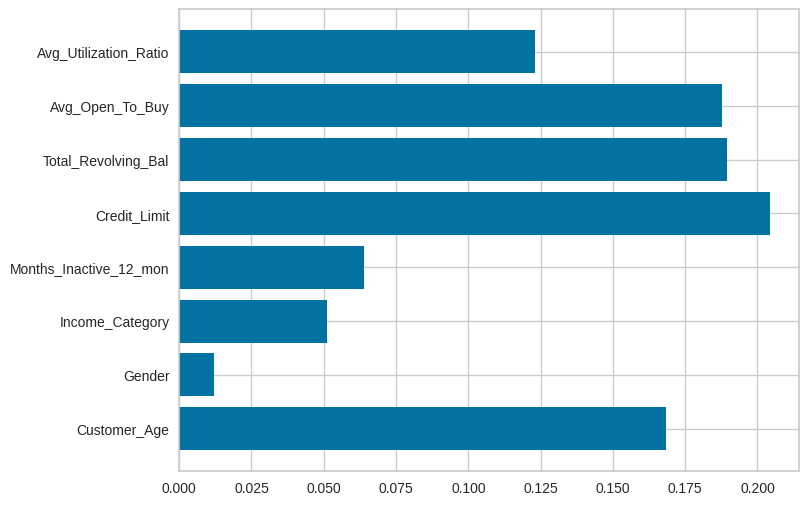

In [ ]:
# Feature Importance
from matplotlib import pyplot                            # Import pyplot (to be able generate the barchart later in this snippet)
plt.rcParams["figure.figsize"] = (8,6)
model = RandomForestClassifier()                         # Create an instance of a RandomForestClassifier
# fit the model
model.fit(X, y)                  # Fit the RandomForest instance using the traiing data
# get importance
importance = model.feature_importances_                  # The RandomForestClassifier instance computes feature importance as a bonus. Store them imprtance values in importance'.
# summarize feature importance
plt.barh(col_names, model.feature_importances_)

##*Correlation Heatmap*

CORRELATION MATRIX
                         Attrition_Flag  Customer_Age    Gender  \
Attrition_Flag                1.000000     -0.018393  0.037272   
Customer_Age                 -0.018393      1.000000 -0.017294   
Gender                        0.037272     -0.017294  1.000000   
Income_Category              -0.017584     -0.012952 -0.539731   
Months_Inactive_12_mon       -0.174552      0.049741 -0.008625   
Credit_Limit                  0.045415      0.002329  0.451928   
Total_Revolving_Bal           0.263053      0.013600  0.029658   
Avg_Open_To_Buy              -0.023199     -0.001535  0.434191   
Avg_Utilization_Ratio         0.185359      0.008032 -0.259111   

                        Income_Category  Months_Inactive_12_mon  Credit_Limit  \
Attrition_Flag                -0.017584               -0.174552      0.045415   
Customer_Age                  -0.012952                0.049741      0.002329   
Gender                        -0.539731               -0.008625      0.45192

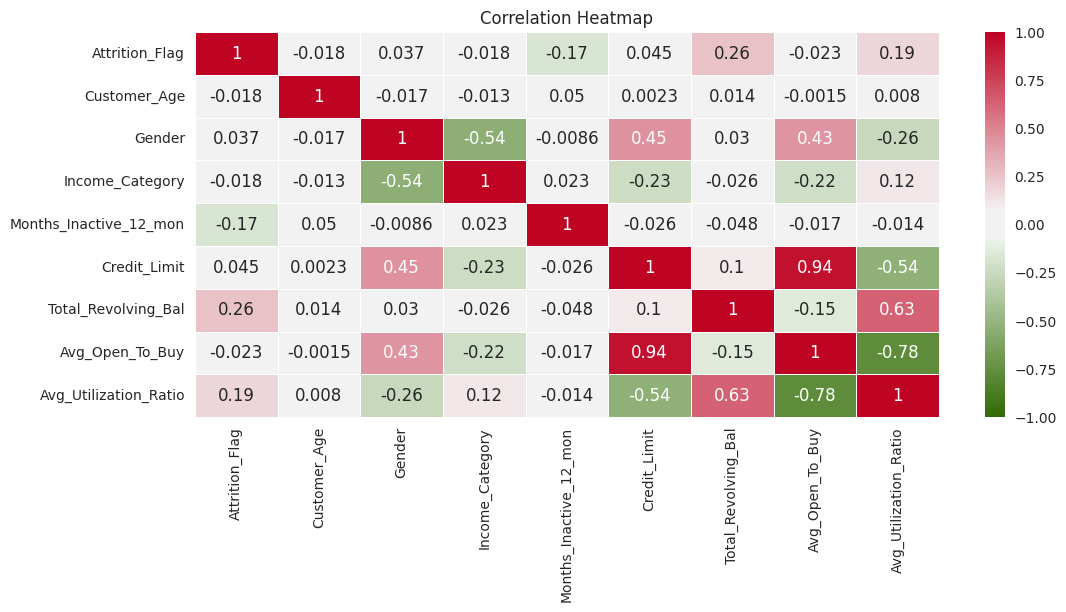

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr(method='pearson', min_periods=1))
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (12,5))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Correlation Heatmap")
plt.show()

##**Classifiers**

The M1 hackathon essentially starts here! Enjoy!
X and y are already set up and you can add and adjust the code for the four  four classifiers (decision tree, Pytorch Lightning neural network, lightGBM and PyCarey) below.

In [ ]:
X.shape

(10127, 8)